# Importamos Librerias

In [ ]:
from keras.datasets import imdb as dataset
#from keras.datasets import reuters as dataset
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from matplotlib import pyplot as plt

# Cargamos y analizamos el dataset

In [ ]:
# Primer hyperparámetro
num_words=30000

(training_data, training_targets), (testing_data, testing_targets) = dataset.load_data(num_words=num_words+2)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# Tengo dos categorías: Sentimiento positivo (1) o sentimiento negativo (0)
num_categories = len(np.unique(targets))
print("Categories:", np.unique(targets))
# Tengo num_words palabras únicas en el vocabulario
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 30000


In [ ]:
# Longitudes promedio de los comentarios de las películas
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173


# Impresión de comentario preprocesado con su etiqueta

In [ ]:
# Imprimo cometario i'esimo con su clasificación de sentimiento
i = 0
print("Label:", targets[i])
# Las comentarios ya están preprocesados
print(data[i])

Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
# Bajamos diccionario de palabras a indices
index = dataset.get_word_index()
print([f'{k}:{v}' for k,v in index.items()][:100])

1654784/1641221 [==============================] - 0s 0us/step
['fawn:34701', 'tsukino:52006', 'nunnery:52007', 'sonja:16816', 'vani:63951', 'woods:1408', 'spiders:16115', 'hanging:2345', 'woody:2289', 'trawling:52008', "hold's:52009", 'comically:11307', 'localized:40830', 'disobeying:30568', "'royale:52010", "harpo's:40831", 'canet:52011', 'aileen:19313', 'acurately:52012', "diplomat's:52013", 'rickman:25242', 'arranged:6746', 'rumbustious:52014', 'familiarness:52015', "spider':52016", 'hahahah:68804', "wood':52017", 'transvestism:40833', "hangin':34702", 'bringing:2338', 'seamier:40834', 'wooded:34703', 'bravora:52018', 'grueling:16817', 'wooden:1636', 'wednesday:16818', "'prix:52019", 'altagracia:34704', 'circuitry:52020', 'crotch:11585', 'busybody:57766', "tart'n'tangy:52021", 'burgade:14129', 'thrace:52023', "tom's:11038", 'snuggles:52025', 'francesco:29114', 'complainers:52027', 'templarios:52125', '272:40835', '273:52028', 'zaniacs:52130', '275:34706', 'consenting:27631', 'snugg

In [ ]:
# Armo diccionario reverso: de indices a palabras
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
print([f'{k}:{v}' for k,v in reverse_index.items()][:100])

['34701:fawn', '52006:tsukino', '52007:nunnery', '16816:sonja', '63951:vani', '1408:woods', '16115:spiders', '2345:hanging', '2289:woody', '52008:trawling', "52009:hold's", '11307:comically', '40830:localized', '30568:disobeying', "52010:'royale", "40831:harpo's", '52011:canet', '19313:aileen', '52012:acurately', "52013:diplomat's", '25242:rickman', '6746:arranged', '52014:rumbustious', '52015:familiarness', "52016:spider'", '68804:hahahah', "52017:wood'", '40833:transvestism', "34702:hangin'", '2338:bringing', '40834:seamier', '34703:wooded', '52018:bravora', '16817:grueling', '1636:wooden', '16818:wednesday', "52019:'prix", '34704:altagracia', '52020:circuitry', '11585:crotch', '57766:busybody', "52021:tart'n'tangy", '14129:burgade', '52023:thrace', "11038:tom's", '52025:snuggles', '29114:francesco', '52027:complainers', '52125:templarios', '40835:272', '52028:273', '52130:zaniacs', '34706:275', '27631:consenting', '40836:snuggled', '15492:inanimate', '52030:uality', '11926:bronte', 

In [ ]:
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[1]] )
print(data[1])
print()
print(decoded)

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 10156, 4, 1153, 9, 194, 775, 7, 8255, 11596, 349, 2637, 148, 605, 15358, 8003, 15, 123, 125, 68, 23141, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 25249, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]

# big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've

In [ ]:
#Observamos el largo de cada artículo 
lengths= [ len(article) for article in data ]

# Graficamos el dataset

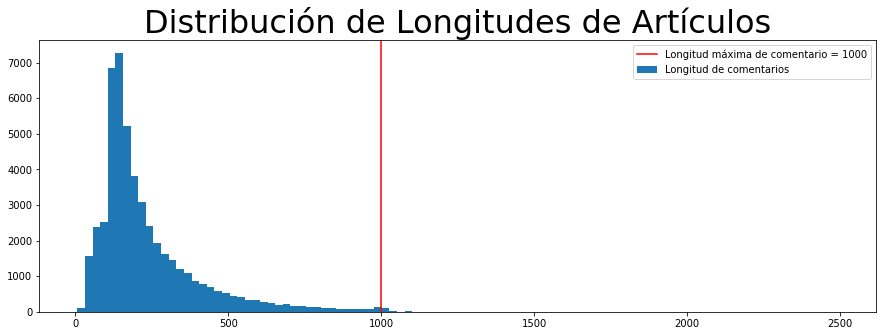

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(lengths,bins=100,label="Longitud de comentarios")
plt.title(label="Distribución de Longitudes de Artículos", fontsize="32",loc="center")
#plt.plot([500,500],[0,1750])
plt.axvline(x=1000, label='Longitud máxima de comentario = {}'.format(1000), c="r")
plt.legend( loc="upper right")
plt.show()

# Padding y formateo de data para entrenar

In [ ]:
# Hyperparametro - Longitud máxima de comentario
maxlen=1000

In [ ]:
data = pad_sequences(data,maxlen=maxlen)

In [ ]:
# Verificamos que todos tengan longitud 1000
print(len(data[0]))
print(np.array([len(d) for d in data]).var())

1000
0.0


In [ ]:
data=np.array(data)

In [ ]:
data.shape

(50000, 1000)

# Armar una MLP con one-hot encoding para resolver el problema

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
# usar maxlen y num_words para calcular la entrada
# Utilizar una sola capa
model = Sequential()
## TODO
salida_densa = num_categories 
input_shape = [maxlen*num_words]
model.add(Dense(salida_densa, input_shape=input_shape, activation='softmax'))

In [ ]:
# model.summary()

## ¿Por que no es viable esta red?

Esta red no es viable por el costo computacional que representa al tener que multiplicar: ``[maxlen * num_words] `` = **_500*30000_**, por esta razón es mas eficiente utilizar embeddings.


# Armar una MLP usando Embeddings
Armamos Red con ``salida_capa_densa =1`` y ``Loss =Binary_CrossEntropy``

In [ ]:
from tensorflow.keras.layers import Embedding, Flatten, Dropout
from tensorflow.keras import optimizers

In [ ]:
# Cantidad de palabras totales contando las reservadas
nb_words=num_words+3
# Tamano del embedding. Es un hiperparámetro y puede modificarlo
embed_dim=32
salida_capa_densa = 1 # por que tiene calificación (+) o (-) va a tener tamaño 1
dropout=0.5 # Hiperparámetro

model = Sequential()
model.add(Embedding(nb_words, embed_dim, input_length= maxlen, trainable=True))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(salida_capa_densa, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 32)          960096    
                                                                 
 flatten_1 (Flatten)         (None, 32000)             0         
                                                                 
 dropout_3 (Dropout)         (None, 32000)             0         
                                                                 
 dense_4 (Dense)             (None, 1)                 32001     
                                                                 
Total params: 992,097
Trainable params: 992,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# MODIFIQUE HYPERPARAMS A GUSTO
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(data,targets,batch_size=32,epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 12s 9ms/step - loss: 0.3993 - accuracy: 0.8117 - val_loss: 0.2474 - val_accuracy: 0.9032
Epoch 2/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.1905 - accuracy: 0.9287 - val_loss: 0.2375 - val_accuracy: 0.9031
Epoch 3/5
1250/1250 [==============================] - 11s 8ms/step - loss: 0.1170 - accuracy: 0.9624 - val_loss: 0.2482 - val_accuracy: 0.9006
Epoch 4/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0714 - accuracy: 0.9797 - val_loss: 0.2637 - val_accuracy: 0.9004
Epoch 5/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0439 - accuracy: 0.9882 - val_loss: 0.2830 - val_accuracy: 0.8985


# Armamos otra MLP usando Embeddings
Armamos Red con ``salida_capa_densa =1`` , ``Loss =Binary_CrossEntropy`` y ``GlobalAveragePooling1D``

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras import optimizers

In [ ]:
# Cantidad de palabras totales contando las reservadas
nb_words=num_words+3
# Tamano del embedding. Es un hiperparámetro y puede modificarlo
embed_dim=32
salida_capa_densa = 1 # por que tiene calificación (+) o (-) va a tener tamaño 1
dropout=0.5 # Hiperparámetro

model = Sequential()
model.add(Embedding(nb_words, embed_dim, input_length= maxlen, trainable=True))
model.add(GlobalAveragePooling1D())
model.add(Dropout(dropout))
model.add(Dense(salida_capa_densa, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 32)          960096    
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 960,129
Trainable params: 960,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# MODIFIQUE HYPERPARAMS A GUSTO
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(data,targets,batch_size=32,epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 12s 9ms/step - loss: 0.6636 - accuracy: 0.6539 - val_loss: 0.6061 - val_accuracy: 0.7978
Epoch 2/5
1250/1250 [==============================] - 11s 9ms/step - loss: 0.5302 - accuracy: 0.8151 - val_loss: 0.4662 - val_accuracy: 0.8481
Epoch 3/5
1250/1250 [==============================] - 13s 11ms/step - loss: 0.4144 - accuracy: 0.8624 - val_loss: 0.3780 - val_accuracy: 0.8749
Epoch 4/5
1250/1250 [==============================] - 11s 9ms/step - loss: 0.3448 - accuracy: 0.8820 - val_loss: 0.3329 - val_accuracy: 0.8781
Epoch 5/5
1250/1250 [==============================] - 11s 9ms/step - loss: 0.3025 - accuracy: 0.8942 - val_loss: 0.3001 - val_accuracy: 0.8925


In [ ]:
model.layers[0].get_weights()[0].shape

(30003, 32)

# Armamos otra MLP usando Embeddings
``Achicamos Dropout a 0.2``

In [ ]:
# Cantidad de palabras totales contando las reservadas
nb_words=num_words+3
# Tamano del embedding. Es un hiperparámetro y puede modificarlo
embed_dim=32
salida_capa_densa = 1 # por que tiene calificación (+) o (-) va a tener tamaño 1
dropout=0.2 # Hiperparámetro

model = Sequential()
model.add(Embedding(nb_words, embed_dim, input_length= maxlen, trainable=True))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(salida_capa_densa, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1000, 32)          960096    
                                                                 
 flatten_3 (Flatten)         (None, 32000)             0         
                                                                 
 dropout_6 (Dropout)         (None, 32000)             0         
                                                                 
 dense_7 (Dense)             (None, 1)                 32001     
                                                                 
Total params: 992,097
Trainable params: 992,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# MODIFIQUE HYPERPARAMS A GUSTO
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
model.fit(data,targets,batch_size=32,epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 12s 9ms/step - loss: 0.3728 - accuracy: 0.8292 - val_loss: 0.2428 - val_accuracy: 0.9037
Epoch 2/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.1637 - accuracy: 0.9400 - val_loss: 0.2442 - val_accuracy: 0.9012
Epoch 3/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0829 - accuracy: 0.9764 - val_loss: 0.2611 - val_accuracy: 0.9005
Epoch 4/5
1250/1250 [==============================] - 11s 9ms/step - loss: 0.0380 - accuracy: 0.9926 - val_loss: 0.2843 - val_accuracy: 0.8973
Epoch 5/5
1250/1250 [==============================] - 11s 9ms/step - loss: 0.0167 - accuracy: 0.9978 - val_loss: 0.3179 - val_accuracy: 0.8942


# Armar una CNN
Abajo hay un ejemplo de arquitectura

In [ ]:
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding_12 (Embedding)     (None, 1000, 32)          960096    
# _________________________________________________________________
# conv1d_7 (Conv1D)            (None, 1000, 64)          14400     
# _________________________________________________________________
# max_pooling1d_4 (MaxPooling1 (None, 500, 64)           0         
# _________________________________________________________________
# conv1d_8 (Conv1D)            (None, 500, 128)          57472     
# _________________________________________________________________
# global_max_pooling1d_4 (Glob (None, 128)               0         
# _________________________________________________________________
# dropout_4 (Dropout)          (None, 128)               0         
# _________________________________________________________________
# dense_19 (Dense)             (None, 46)                5934      
# =================================================================

In [ ]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense
num_filters=64

model = Sequential()                                                              
model.add(Embedding(nb_words, embed_dim, input_length= maxlen, trainable=True))   
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))      #filters, kernel_size,          
model.add(MaxPooling1D(2)) #pool_size=2
model.add(Conv1D(num_filters*2, 7, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 1000, 32)          960096    
                                                                 
 conv1d_15 (Conv1D)          (None, 1000, 64)          14400     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 500, 64)          0         
 1D)                                                             
                                                                 
 conv1d_16 (Conv1D)          (None, 500, 128)          57472     
                                                                 
 global_max_pooling1d_6 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_12 (Dropout)        (None, 128)             

In [ ]:
# MODIFIQUE HYPERPARAMS A GUSTO
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(data,targets,batch_size=32,epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 27s 20ms/step - loss: 0.3725 - accuracy: 0.8231 - val_loss: 0.2388 - val_accuracy: 0.9064
Epoch 2/5
1250/1250 [==============================] - 24s 19ms/step - loss: 0.1852 - accuracy: 0.9310 - val_loss: 0.2296 - val_accuracy: 0.9088
Epoch 3/5
1250/1250 [==============================] - 24s 19ms/step - loss: 0.1007 - accuracy: 0.9655 - val_loss: 0.2651 - val_accuracy: 0.9058
Epoch 4/5
1250/1250 [==============================] - 25s 20ms/step - loss: 0.0572 - accuracy: 0.9811 - val_loss: 0.3745 - val_accuracy: 0.8972
Epoch 5/5
1250/1250 [==============================] - 24s 19ms/step - loss: 0.0361 - accuracy: 0.9888 - val_loss: 0.3979 - val_accuracy: 0.8955


# Probamos Armar otra CNN

In [ ]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense

model = Sequential()                                                              
model.add(Embedding(nb_words, embed_dim, input_length= maxlen, trainable=True))   
model.add(Conv1D(32, 5, activation='relu', padding='same'))      #filters, kernel_size,          
model.add(MaxPooling1D(2)) #pool_size=2
model.add(Conv1D(64, 5, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 5, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

#print(model.summary())

# MODIFIQUE HYPERPARAMS A GUSTO
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(data,targets,batch_size=32,epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 22s 17ms/step - loss: 0.3710 - accuracy: 0.8003 - val_loss: 0.2217 - val_accuracy: 0.9103
Epoch 2/5
1250/1250 [==============================] - 20s 16ms/step - loss: 0.1472 - accuracy: 0.9446 - val_loss: 0.2306 - val_accuracy: 0.9111
Epoch 3/5
1250/1250 [==============================] - 21s 16ms/step - loss: 0.0652 - accuracy: 0.9779 - val_loss: 0.2925 - val_accuracy: 0.9004
Epoch 4/5
1250/1250 [==============================] - 20s 16ms/step - loss: 0.0326 - accuracy: 0.9891 - val_loss: 0.4244 - val_accuracy: 0.8996
Epoch 5/5
1250/1250 [==============================] - 21s 17ms/step - loss: 0.0156 - accuracy: 0.9953 - val_loss: 0.4880 - val_accuracy: 0.9044


# Probamos Armar otra CNN
Probamos la CNN sin Dropout

In [ ]:
model = Sequential()                                                              
model.add(Embedding(nb_words, embed_dim, input_length= maxlen, trainable=True))   
model.add(Conv1D(32, 5, activation='relu', padding='same'))      #filters, kernel_size,          
model.add(MaxPooling1D(2)) #pool_size=2
model.add(Conv1D(64, 5, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 5, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Flatten())
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

#print(model.summary())

# MODIFIQUE HYPERPARAMS A GUSTO
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(data,targets,batch_size=32,epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 22s 17ms/step - loss: 0.3339 - accuracy: 0.8328 - val_loss: 0.2061 - val_accuracy: 0.9176
Epoch 2/5
1250/1250 [==============================] - 21s 17ms/step - loss: 0.1386 - accuracy: 0.9495 - val_loss: 0.2179 - val_accuracy: 0.9137
Epoch 3/5
1250/1250 [==============================] - 20s 16ms/step - loss: 0.0609 - accuracy: 0.9793 - val_loss: 0.3045 - val_accuracy: 0.9042
Epoch 4/5
1250/1250 [==============================] - 20s 16ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.5198 - val_accuracy: 0.8898
Epoch 5/5
1250/1250 [==============================] - 24s 19ms/step - loss: 0.0177 - accuracy: 0.9947 - val_loss: 0.5230 - val_accuracy: 0.9009
